# 4. Сверточные нейронные сети.

__Автор__: Никита Владимирович Блохин (NVBlokhin@fa.ru)

Финансовый университет, 2020 г. 

In [34]:
'''Импорт библиотек'''
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import OrderedDict
import seaborn as sns
import zipfile
from tqdm import tqdm


import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''Функция для просмотра изображения и его прогнозируемых классов'''
def view(img, ps, version="MNIST"):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

## 1. Классификация предметов одежды (датасет Fashion MNIST)



### 1.1 Решить задачу классификации, не используя сверточные слои. 
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
train = datasets.FashionMNIST('./data/fmnist', train=True, download=True, transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/fmnist\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data/fmnist\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/fmnist\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data/fmnist\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/fmnist\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/fmnist\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/fmnist\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/fmnist\FashionMNIST\raw



In [ ]:
train.__dict__

{'root': './data/fmnist',
 'transform': ToTensor(),
 'target_transform': None,
 'transforms': StandardTransform
 Transform: ToTensor(),
 'train': True,
 'data': tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         ...,
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,

In [ ]:
test = datasets.FashionMNIST('./data/fmnist', train=False, download=True, transform=transforms.ToTensor())

In [ ]:
train_loader = torch.utils.data.DataLoader(train, batch_size=100)
test_loader = torch.utils.data.DataLoader(test, batch_size=100)

In [ ]:
train_loader.__dict__

{'dataset': Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./data/fmnist
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 'num_workers': 0,
 'prefetch_factor': 2,
 'pin_memory': False,
 'pin_memory_device': '',
 'timeout': 0,
 'worker_init_fn': None,
 '_DataLoader__multiprocessing_context': None,
 '_dataset_kind': 0,
 'batch_size': 100,
 'drop_last': False,
 'sampler': <torch.utils.data.sampler.SequentialSampler at 0x1b6bb930ca0>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x1b6aeee8640>,
 'generator': None,
 'collate_fn': <function torch.utils.data._utils.collate.default_collate(batch)>,
 'persistent_workers': False,
 '_DataLoader__initialized': True,
 '_IterableDataset_len_called': None,
 '_iterator': None}

In [ ]:
len(next(iter(train_loader)))

2

In [ ]:
len(next(iter(train_loader))[0])

100

In [ ]:
next(iter(train_loader))[0].size()

torch.Size([100, 1, 28, 28])

In [ ]:
class nn_fashion(nn.Module): 
    def __init__(self):
        super().__init__()

        self.l1 = nn.Linear(in_features=28*28, out_features=600)
        self.l2 = nn.Linear(in_features=600, out_features=400)
        self.l3 = nn.Linear(in_features=400, out_features=200)
        self.l4 = nn.Linear(in_features=200, out_features=10)
        self.softmax = torch.nn.Softmax(dim=1)
        self.sigmoid = torch.nn.Sigmoid()
  
    def forward(self, inputs):
        inputs = inputs.view(inputs.shape[0], -1)
        return self.softmax(
            self.l4(
                self.sigmoid(
                    self.l3(
                        self.sigmoid(
                            self.l2(self.sigmoid(
                                self.l1(inputs)
                                    )
                                )
                            )
                          )
                      )
                  )
              )

In [ ]:
model = nn_fashion()
loss = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_epochs = 50
losses = []
for epoch in tqdm(range(n_epochs)):
    loss_ = 0
    for images, labels in train_loader:
        lables_pred = model(images)

        current_loss = loss(lables_pred, labels)

        current_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_ += current_loss
    
    losses.append(loss_ / len(train_loader))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [28:44<00:00, 34.48s/it]


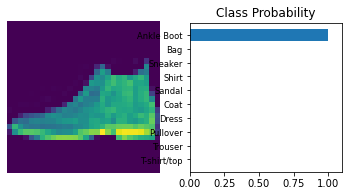

In [ ]:
images, lables = iter(test_loader).next()  
#Изображения и вероятности 
view(images[0], model(images[0]), version = 'Fashion')

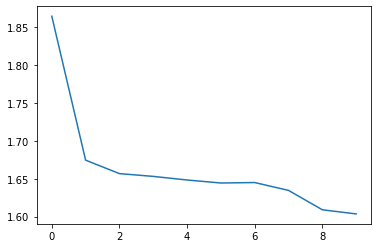

In [ ]:
with torch.no_grad():
    plt.plot(np.arange(len(losses))[0:10], np.array(losses)[0:10])

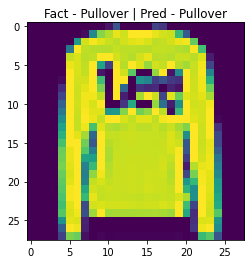

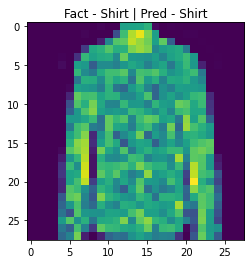

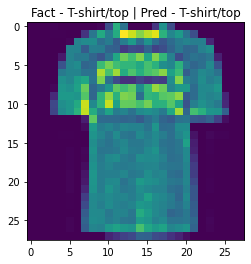

In [ ]:
predictions_list = []
labels_list = []
classes = test.classes
c = 0
for images, labels in test_loader:
    c += 1
    labels_list.append(labels)
  
    lables_pred = model(images)
    predictions_list.append(torch.max(lables_pred, 1)[1])

    if c < 4:
        plt.imshow(images.numpy()[1][0])
        plt.title(f'Fact - {classes[labels[1]]} | Pred - {classes[lables_pred.argmax(dim=1)[1]]}')
        plt.show()

Accuracy = 0.8



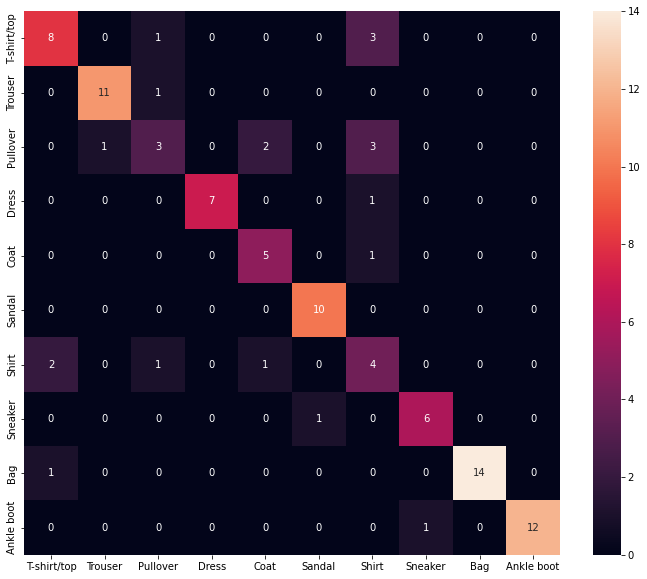

In [ ]:
lables_pred = model(images)

print(f'Accuracy = {accuracy_score(lables_pred.argmax(dim=1), labels)}\n')

plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(lables_pred.argmax(dim=1), labels), annot=True)
plt.xticks(ticks=[i+0.5 for i in range(10)], labels=classes)
plt.yticks(ticks=[i+0.5 for i in range(10)], labels=classes)
plt.show()

### 1.2 Решить задачу 1.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 90%
* Визуализировать результаты работы первого сверточного слоя

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):

        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)

        t = self.fc2(t)
        t = F.relu(t)

        t = self.out(t)

        return t

In [ ]:
model = Network()
loss = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_epochs = 50
losses = []
for epoch in tqdm(range(n_epochs)):
    loss_ = 0
    for images, labels in train_loader:
        lables_pred = model(images)

        current_loss = loss(lables_pred, labels)

        current_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_ += current_loss
    
    losses.append(loss_ / len(train_loader))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [13:31<00:00, 16.22s/it]


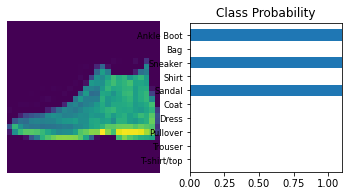

In [ ]:
images, lables = iter(test_loader).next()  
#Изображения и вероятности 
view(images[0], model(images[0]), version = 'Fashion')

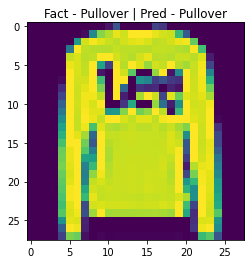

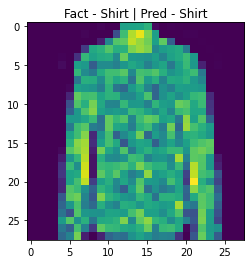

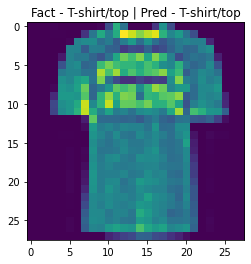

In [ ]:
predictions_list = []
labels_list = []
classes = test.classes
c = 0
for images, labels in test_loader:
    c += 1
    labels_list.append(labels)
  
    lables_pred = model(images)
    predictions_list.append(torch.max(lables_pred, 1)[1])

    if c < 4:
        plt.imshow(images.numpy()[1][0])
        plt.title(f'Fact - {classes[labels[1]]} | Pred - {classes[lables_pred.argmax(dim=1)[1]]}')
        plt.show()

Accuracy = 0.89



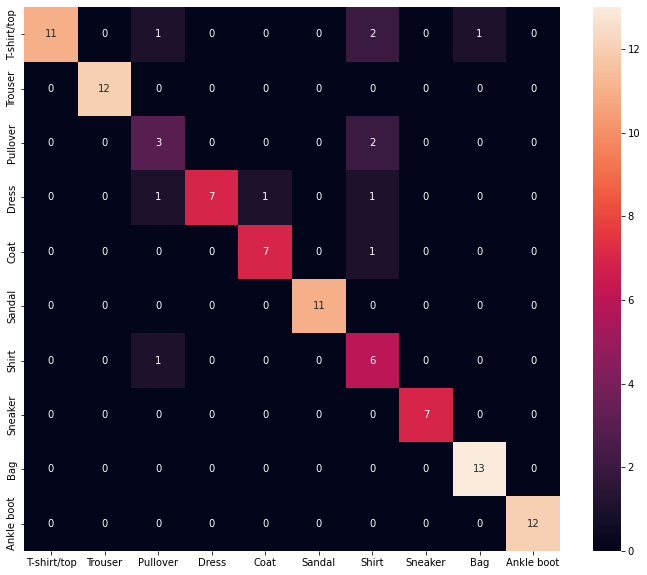

In [ ]:
#Accuracy уменьшается/увеличивается на пару пунктов с разными прогонами, проверено
lables_pred = model(images)

print(f'Accuracy = {accuracy_score(lables_pred.argmax(dim=1), labels)}\n')
plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(lables_pred.argmax(dim=1), labels), annot=True)
plt.xticks(ticks=[i+0.5 for i in range(10)], labels=classes)
plt.yticks(ticks=[i+0.5 for i in range(10)], labels=classes)
plt.show()

##  2. Классификация изображений (датасет CIFAR 10) 


### 2.1 Решить задачу классификации, не используя сверточные слои. 

* Нормализовать данные (если необходимо)
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
train_cifar = datasets.cifar.CIFAR10('./data/cifar', train=True, download=True, transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar\cifar-10-python.tar.gz to ./data/cifar


In [ ]:
test_cifar = datasets.cifar.CIFAR10('./data/cifar', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(train_cifar, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_cifar, batch_size=100)

In [ ]:
class nn_cifar(nn.Module): 
    def __init__(self):
        super().__init__()

        self.l1 = nn.Linear(in_features=32*32*3, out_features=1500)
        self.l2 = nn.Linear(in_features=1500, out_features=1000)
        self.l3 = nn.Linear(in_features=1000, out_features=500)
        self.l4 = nn.Linear(in_features=500, out_features=10)
        self.softmax = torch.nn.Softmax(dim=1)
        self.sigmoid = torch.nn.Sigmoid()
        self.rl = torch.nn.ReLU()
  
    def forward(self, inputs):
        inputs = inputs.view(inputs.shape[0], -1)
        return self.softmax(
            self.l4(
                self.sigmoid(
                    self.l3(
                        self.sigmoid(
                            self.l2(self.rl(
                                self.l1(inputs)
                                    )
                                )
                            )
                          )
                      )
                  )
              )

In [ ]:
model = nn_cifar()
loss = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_epochs = 5
losses = []
for epoch in tqdm(range(n_epochs)):
    loss_ = 0
    for images, labels in train_loader:
        lables_pred = model(images)

        current_loss = loss(lables_pred, labels)

        current_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_ += current_loss
    
    losses.append(loss_ / len(train_loader))

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [06:20<00:00, 76.03s/it]


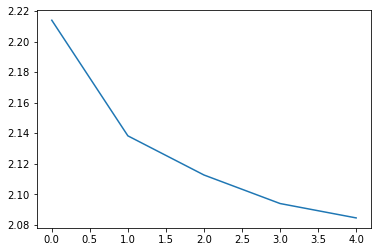

In [ ]:
with torch.no_grad():
    plt.plot(np.arange(len(losses))[0:10], np.array(losses)[0:10])

In [ ]:
accuracy = 0
loss_ = 0
predicts = []
labels_ = []
all_classes = test.classes

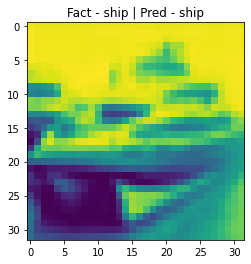

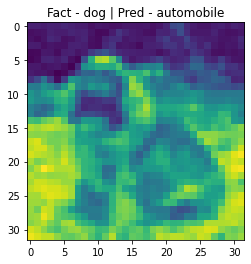

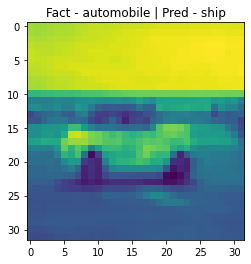

In [ ]:
predictions_list = []
labels_list = []
classes = test_cifar.classes
c = 0
for images, labels in test_loader:
    c += 1
    labels_list.append(labels)
  
    lables_pred = model(images)
    predictions_list.append(torch.max(lables_pred, 1)[1])

    if c < 4:
        plt.imshow(images.numpy()[1][0])
        plt.title(f'Fact - {classes[labels[1]]} | Pred - {classes[lables_pred.argmax(dim=1)[1]]}')
        plt.show()

Accuracy = 0.31



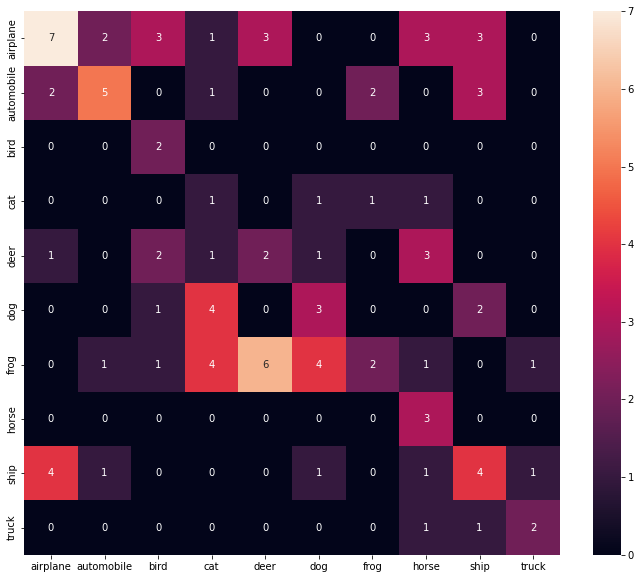

In [ ]:
lables_pred = model(images)

print(f'Accuracy = {accuracy_score(lables_pred.argmax(dim=1), labels)}\n')

plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(lables_pred.argmax(dim=1), labels), annot=True)
plt.xticks(ticks=[i+0.5 for i in range(10)], labels=classes)
plt.yticks(ticks=[i+0.5 for i in range(10)], labels=classes)
plt.show()

### 2.2 Решить задачу 2.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 70%.
* Визуализировать результаты работы первого сверточного слоя

In [ ]:
next(iter(train_loader))[0].size()

torch.Size([100, 3, 32, 32])

In [ ]:
class CIFAR10CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.y = nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=3, padding=1),
            torch.nn.MaxPool2d(2),

            torch.nn.Conv2d(16, 32, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.MaxPool2d(2),

            torch.nn.Conv2d(32, 64, kernel_size=3, padding=1),
            torch.nn.MaxPool2d(2),
            torch.nn.ReLU(),

            torch.nn.Flatten(),
            torch.nn.Linear(1024, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 10),
            nn.Softmax(dim=1)) 
        
    def __call__(self, inputs):
        y_pr = self.y(inputs)
        return y_pr

In [ ]:
model = CIFAR10CNN()
loss_list = []
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in tqdm(range(10)):
    full_loss = 0
    for images, labels in train_loader:
        lables_pred = model(images)
        f_loss = loss(lables_pred, labels)

        f_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        full_loss += f_loss.item()
    loss_list.append(full_loss / len(train_loader))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [06:38<00:00, 39.88s/it]


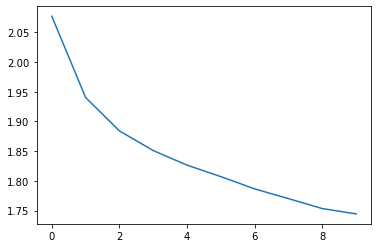

In [ ]:
with torch.no_grad():
    plt.plot(np.arange(len(loss_list))[0:10], np.array(loss_list)[0:10])

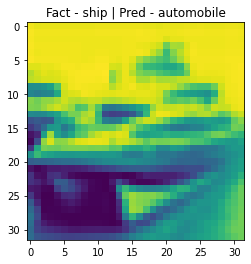

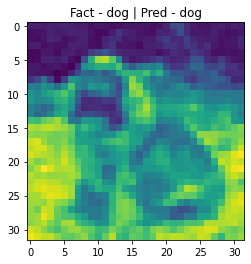

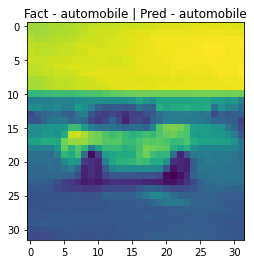

In [ ]:
predictions_list, labels_list = [], []
classes = test_cifar.classes
c = 0
for images, labels in test_loader:
    c += 1
    labels_list.append(labels)
  
    lables_pred = model(images)
    predictions_list.append(torch.max(lables_pred, 1)[1])

    if c < 4:
        plt.imshow(images.numpy()[1][0])
        plt.title(f'Fact - {classes[labels[1]]} | Pred - {classes[lables_pred.argmax(dim=1)[1]]}')
        plt.show()

Accuracy = 0.69



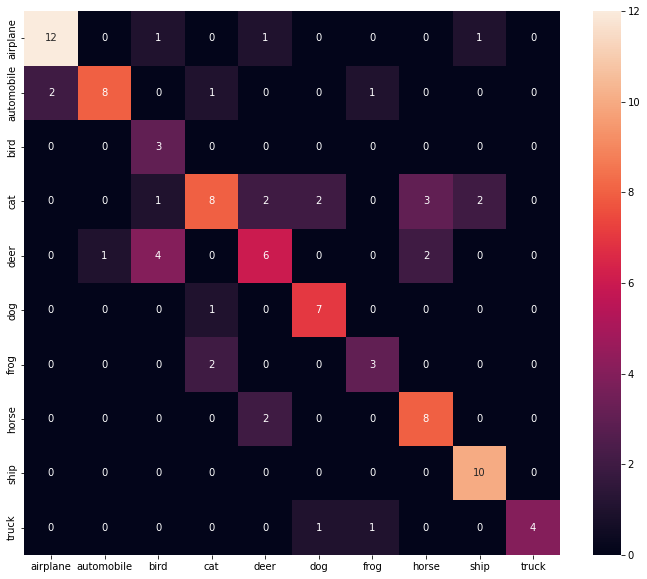

In [ ]:
#Accuracy уменьшается/увеличивается на пару пунктов с разными прогонами, проверено
for images, labels in test_loader:
    pass

lables_pred = model(images)

print(f'Accuracy = {accuracy_score(lables_pred.argmax(dim=1), labels)}\n')

plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(lables_pred.argmax(dim=1), labels), annot=True)
plt.xticks(ticks=[i+0.5 for i in range(10)], labels=classes)
plt.yticks(ticks=[i+0.5 for i in range(10)], labels=classes)
plt.show()

## 3. Загрузка изображений из внешних источников

### 3.1 Решить задачу классификации обезьян (датасет [monkey.zip](https://disk.yandex.ru/d/OxYgY4S7aR6ulQ)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 60%

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import zipfile
from tqdm import tqdm

zf = zipfile.ZipFile('drive/MyDrive/datasets/monkeys.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

100%|██████████| 1371/1371 [00:13<00:00, 105.13it/s]


In [37]:
names = []
with open('monkey_labels.txt') as f:
    for line in f:
        if line[0] != 'L' and line[0] != '\n':
            names.append(line.split(',')[2].strip())
f.close()
print(len(names))

10


In [38]:
trans = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                        torchvision.transforms.Resize((224, 224)),
                                        transforms.Normalize((0.5,), (0.5,))
                                        ])
train_mnks = torchvision.datasets.ImageFolder('training/training', transform=trans)
mnks_dl = torch.utils.data.DataLoader(train_mnks, batch_size=32, shuffle=True)

val_mnks = torchvision.datasets.ImageFolder('validation/validation', transform=trans)
mnks_val_dl = torch.utils.data.DataLoader(val_mnks, batch_size=len(val_mnks), shuffle=True)

In [39]:
class MonkeysCNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.y = nn.Sequential(
        nn.Conv2d(3, 8, kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(8, 16, kernel_size=3),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(16, 32, kernel_size=3),
        nn.ReLU(),
        torch.nn.MaxPool2d(2),

        nn.Conv2d(32, 32, kernel_size=3),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Flatten(),

        nn.Linear(4608, 2048),
        nn.ReLU(),
        nn.Linear(2048, 512),
        nn.ReLU(),
        nn.Linear(512, 128),
        nn.ReLU(),
        nn.Linear(128, 10)) 
        
  def __call__(self, inputs):
    y_pr = self.y(inputs)
    return y_pr

In [40]:
model = MonkeysCNN()
loss_list = []
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in tqdm(range(5)):
    full_loss = 0
    for images, labels in mnks_dl:
        lables_pred = model(images)
        f_loss = loss(lables_pred, labels)

        f_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        full_loss += f_loss.item()
    loss_list.append(full_loss / len(mnks_dl))

100%|██████████| 5/5 [05:02<00:00, 60.40s/it]


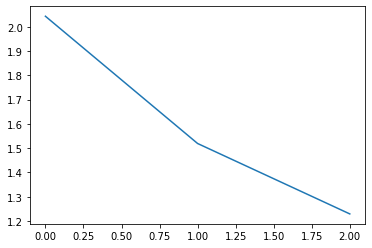

In [41]:
with torch.no_grad():
  plt.plot(np.arange(len(loss_list))[0:3], np.array(loss_list)[0:3])

In [42]:
loss_list[-1]

0.7850070221083505

In [43]:
predictions_list, labels_list = [], []
classes = names
for images, labels in mnks_val_dl:
  labels_list.append(labels)
  
  lables_pred = model(images)
  predictions_list.append(torch.max(lables_pred, 1)[1])

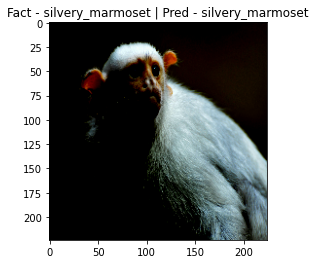

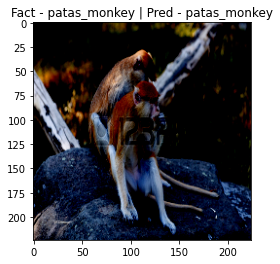

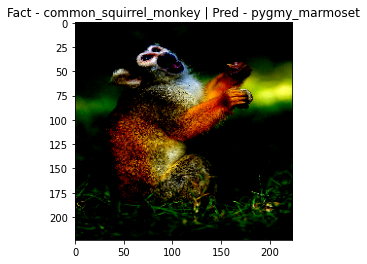

In [44]:
for i in range(3):
  plt.imshow(images[i].permute(1, 2, 0))
  plt.title(f'Fact - {names[labels[i]]} | Pred - {names[lables_pred.argmax(dim=1)[i]]}')
  plt.show()

Accuracy = 0.6102941176470589



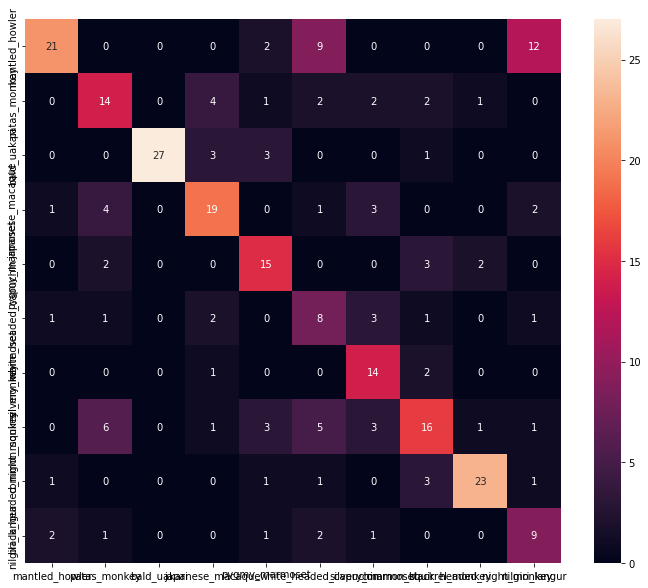

In [45]:
lables_pred = model(images)

print(f'Accuracy = {accuracy_score(lables_pred.argmax(dim=1), labels)}\n')
plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(lables_pred.argmax(dim=1), labels), annot=True)
plt.xticks(ticks=[i+0.5 for i in range(10)], labels=classes)
plt.yticks(ticks=[i+0.5 for i in range(10)], labels=classes)
plt.show()

In [46]:
from sklearn import metrics
# Посмотрим основные метрики классификации в отчете
print(metrics.classification_report(lables_pred.argmax(dim=1), labels))

              precision    recall  f1-score   support

           0       0.81      0.48      0.60        44
           1       0.50      0.54      0.52        26
           2       1.00      0.79      0.89        34
           3       0.63      0.63      0.63        30
           4       0.58      0.68      0.62        22
           5       0.29      0.47      0.36        17
           6       0.54      0.82      0.65        17
           7       0.57      0.44      0.50        36
           8       0.85      0.77      0.81        30
           9       0.35      0.56      0.43        16

    accuracy                           0.61       272
   macro avg       0.61      0.62      0.60       272
weighted avg       0.66      0.61      0.62       272



Немного теории:

**Точность (precision)** показывает какую долю объектов, распознанных как объекты положительного класса, мы предсказали верно.

**Полнота (recall)** показывает, какую долю объектов, реально относящихся к положительному классу, мы предсказали верно.

**F-мера (f1-score)** - среднее гармоническое точности и полноты. Вводится в ситуациях, если мы обучили модель с высокой точностью, и случилось так, что полнота у такого классификатора низкая и наоборот.

Все метрики показывают +-61%.
Таким образом по отчету метрик классификации можно сделать вывод, что особой несбалансированности между метриками нет, поэтому accuracy тоже можно верить.

Если рассматривать отчет более детально, то стоит заметить, что самая худшая точность распознавания объектов в классах 5 и 9, а лучшая - в классе 2.

Если говорить о полноте, то наихудщие результаты - класс 7, 5, 0, а наилучшие - 2 и 8.

Кстати интересно понаблюдать о метриках класса 0: precision = 81%, recall = 48%. Скорее всего применимо к этому классу модель делает высокоточные предсказания, определяя класс Positive, но производит всего несколько таких прогнозов.

Если говорить о качестве модели в целом, то оно среднее = 61%.

### 3.2 Решить задачу классификации собак и кошек (датасет [cats_dogs.zip](https://disk.yandex.ru/d/wQtt5O1JF9ctnA)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 80%

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
zf = zipfile.ZipFile('drive/MyDrive/datasets/cats_dogs.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

100%|██████████| 25004/25004 [00:11<00:00, 2098.91it/s]


In [49]:
trans = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                        torchvision.transforms.Resize((224, 224)),
                                        transforms.Normalize((0.5,), (0.5,))
                                        ])
c_d = torchvision.datasets.ImageFolder('cats_dogs/train', transform=trans)

train_cd, val_cd = torch.utils.data.random_split(c_d, lengths=(int(len(c_d)*0.8), len(c_d) - int(len(c_d)*0.8)))

train_cd_dl = torch.utils.data.DataLoader(train_cd, batch_size=32, shuffle=True)
valid_cd_dl = torch.utils.data.DataLoader(val_cd, batch_size=512, shuffle=True)

In [50]:
class cats_dogs_CNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.y = nn.Sequential(
        nn.Conv2d(3, 8, kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(8, 16, kernel_size=3),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(16, 32, kernel_size=3),
        nn.ReLU(),
        torch.nn.MaxPool2d(2),

        nn.Conv2d(32, 32, kernel_size=3),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Flatten(),

        nn.Linear(4608, 2048),
        nn.ReLU(),
        nn.Linear(2048, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 128),
        nn.ReLU(),
        nn.Linear(128, 10)) 
        
  def __call__(self, inputs):
    y_pr = self.y(inputs)
    return y_pr

In [51]:
model = cats_dogs_CNN()

loss_list = []
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in tqdm(range(3)):
    full_loss = 0
    for images, labels in train_cd_dl:
        lables_pred = model(images)
        f_loss = loss(lables_pred, labels)

        f_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        full_loss += f_loss.item()
    loss_list.append(full_loss / len(train_cd_dl))

100%|██████████| 3/3 [24:02<00:00, 480.73s/it]


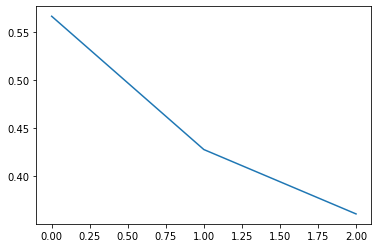

In [52]:
with torch.no_grad():
  plt.plot(np.arange(len(loss_list))[0:3], np.array(loss_list)[0:3])

In [53]:
loss_list[-1]

0.3611260899066925

In [54]:
predictions_list, labels_list = [], []
for images, labels in valid_cd_dl:
  labels_list.append(labels)
  
  lables_pred = model(images)
  predictions_list.append(torch.max(lables_pred, 1)[1])

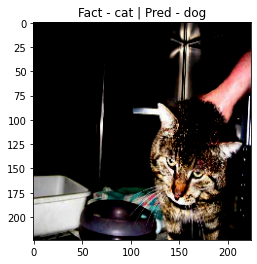

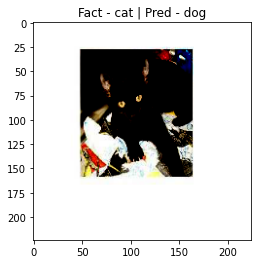

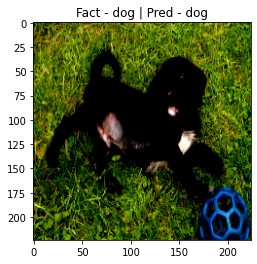

In [55]:
animal = ['cat', 'dog']
for i in range(3):
  plt.imshow(images[i].permute(1, 2, 0))
  plt.title(f'Fact - {animal[labels[i]]} | Pred - {animal[lables_pred.argmax(dim=1)[i]]}')
  plt.show()

Accuracy = 0.8571428571428571



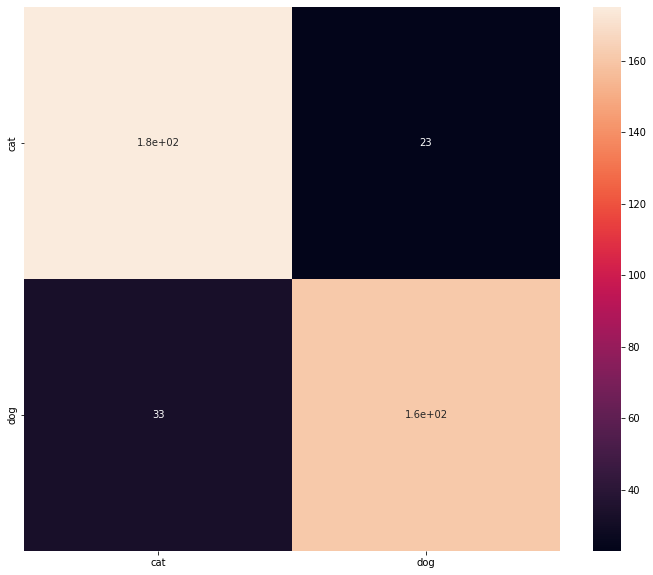

In [56]:
lables_pred = model(images)

print(f'Accuracy = {accuracy_score(lables_pred.argmax(dim=1), labels)}\n')

plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(lables_pred.argmax(dim=1), labels), annot=True)
plt.xticks(ticks=[i+0.5 for i in range(2)], labels=animal)
plt.yticks(ticks=[i+0.5 for i in range(2)], labels=animal)
plt.show()

In [57]:
from sklearn import metrics
# Посмотрим основные метрики классификации в отчете
print(metrics.classification_report(lables_pred.argmax(dim=1), labels))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       198
           1       0.88      0.83      0.85       194

    accuracy                           0.86       392
   macro avg       0.86      0.86      0.86       392
weighted avg       0.86      0.86      0.86       392



Смотрим на метрики классификации в отчете. Основываясь на результатах всех метрик, можно сделать вывод, что модель работает отлично. Точность = 86%.

Все метрики показывают 86%. Таким образом по отчету метрик классификации можно сделать вывод, что особой несбалансированности между метриками нет, поэтому accuracy тоже можно верить.

# 4. Transfer Learning

### 4.1 Решить задачу 3.1, воспользовавшись предобученной моделью VGG16
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель (не замораживать веса). Вычислить значение accuracy на тестовом множестве
* Дообучить модель (заморозить все веса, кроме последнего блока слоев (`classifier`)). 
* Вычислить значение accuracy на тестовом множестве.


In [58]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [59]:
train_dir = Path('training/training')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))
test_dir = Path('validation/validation')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [61]:
def proc_img(filepath):
    """ Создание данных с указанием пути к файлу и меток изображений"""
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    df = pd.concat([filepath, labels], axis=1)
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)

print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

train_df.head(5)

Number of pictures: 1096

Number of different labels: 10

Labels: ['n0' 'n4' 'n9' 'n2' 'n1' 'n6' 'n3' 'n5' 'n7' 'n8']


,Filepath,Label
0,training/training/n0/n0035.jpg,n0
1,training/training/n4/n4113.jpg,n4
2,training/training/n9/n9053.jpg,n9
3,training/training/n2/n2017.jpg,n2
4,training/training/n1/n1034.jpg,n1


In [62]:
name_dic = {'n0':'alouatta palliata', 
            'n1':'erythrocebus patas', 
            'n2':'cacajao calvus', 
            'n3':'macaca fuscata', 
            'n4':'cebuella pygmea', 
            'n5':'cebus capucinus', 
            'n6':'mico argentatus', 
            'n7':'saimiris ciureus', 
            'n8':'aotus nigriceps', 
            'n9':'trachypithecus johnii'}

train_df['Label'] = train_df['Label'].apply(lambda n: name_dic[n])
test_df['Label'] = test_df['Label'].apply(lambda n: name_dic[n])

In [63]:
train_df.head()

,Filepath,Label
0,training/training/n0/n0035.jpg,alouatta palliata
1,training/training/n4/n4113.jpg,cebuella pygmea
2,training/training/n9/n9053.jpg,trachypithecus johnii
3,training/training/n2/n2017.jpg,cacajao calvus
4,training/training/n1/n1034.jpg,erythrocebus patas


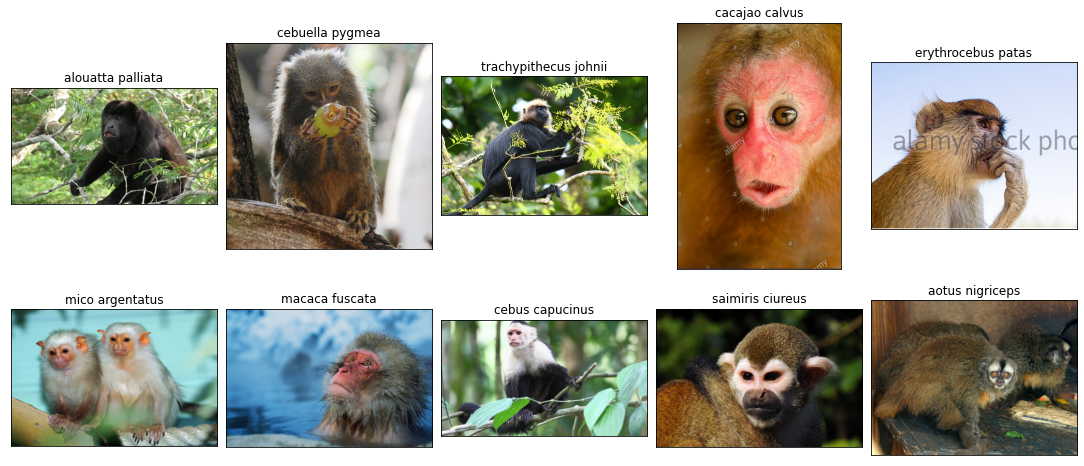

In [64]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i])
plt.tight_layout(pad=0.5)
plt.show()

In [65]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)


train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 877 validated image filenames belonging to 10 classes.
Found 219 validated image filenames belonging to 10 classes.
Found 272 validated image filenames belonging to 10 classes.


In [66]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [67]:
inputs = pretrained_model.input


x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
28/28 [==============================] - 42s 1s/step - loss: 0.7668 - accuracy: 0.8107 - val_loss: 0.1230 - val_accuracy: 0.9680
Epoch 2/50
28/28 [==============================] - 29s 1s/step - loss: 0.0525 - accuracy: 0.9875 - val_loss: 0.1346 - val_accuracy: 0.9589
Epoch 3/50
28/28 [==============================] - 31s 1s/step - loss: 0.0162 - accuracy: 0.9977 - val_loss: 0.0579 - val_accuracy: 0.9817
Epoch 4/50
28/28 [==============================] - 33s 1s/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9772
Epoch 5/50
28/28 [==============================] - 36s 1s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0512 - val_accuracy: 0.9817
Epoch 6/50
28/28 [==============================] - 27s 974ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0544 - val_accuracy: 0.9817
Epoch 7/50
28/28 [==============================] - 26s 930ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0540 - val_accuracy: 0.9817
Epoch 8/50
28/

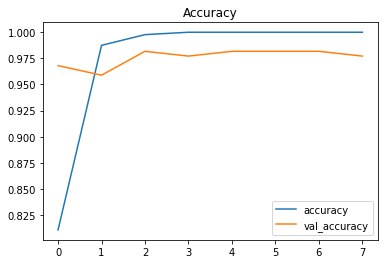

In [68]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

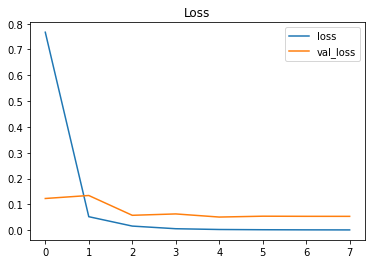

In [69]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [70]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

print(f'The first 5 predictions: {pred[:5]}')

9/9 [==============================] - 9s 936ms/step
The first 5 predictions: ['erythrocebus patas', 'trachypithecus johnii', 'macaca fuscata', 'aotus nigriceps', 'aotus nigriceps']


In [71]:
from sklearn.metrics import accuracy_score
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

Accuracy on the test set: 98.16%


In [72]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                       precision    recall  f1-score   support

    alouatta palliata       0.93      1.00      0.96        26
      aotus nigriceps       1.00      0.96      0.98        27
       cacajao calvus       1.00      1.00      1.00        27
      cebuella pygmea       1.00      1.00      1.00        26
      cebus capucinus       1.00      1.00      1.00        28
   erythrocebus patas       0.97      1.00      0.98        28
       macaca fuscata       0.97      1.00      0.98        30
      mico argentatus       1.00      0.96      0.98        26
     saimiris ciureus       0.97      1.00      0.98        28
trachypithecus johnii       1.00      0.88      0.94        26

             accuracy                           0.98       272
            macro avg       0.98      0.98      0.98       272
         weighted avg       0.98      0.98      0.98       272



Все метрики показывают 98%. Таким образом по отчету метрик классификации можно сделать вывод, что несбалансированности между метриками нет, поэтому accuracy тоже можно верить.

Модель показала отличные результаты, точность = 98%.

Если рассматривать метрики более детально, то все классы при классификации имеют как высокую точность, так и высокую полноту. 

Лучше всего предсказаны классы  cacajao calvus, cebuella pygmea, cebus capucinus, которые имеют 100% точность и полноту предсказания.

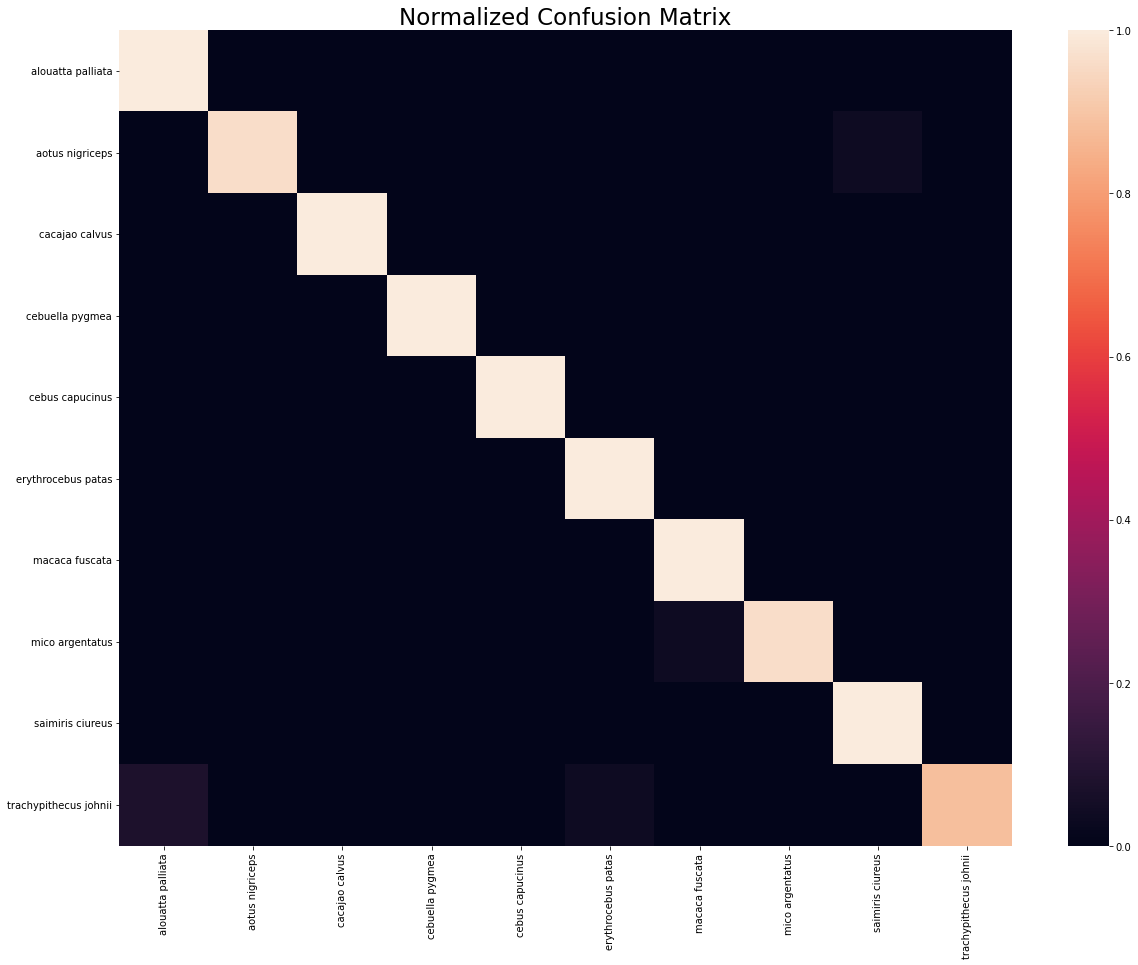

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (20,15))
sns.heatmap(cf_matrix, annot=False, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.show()

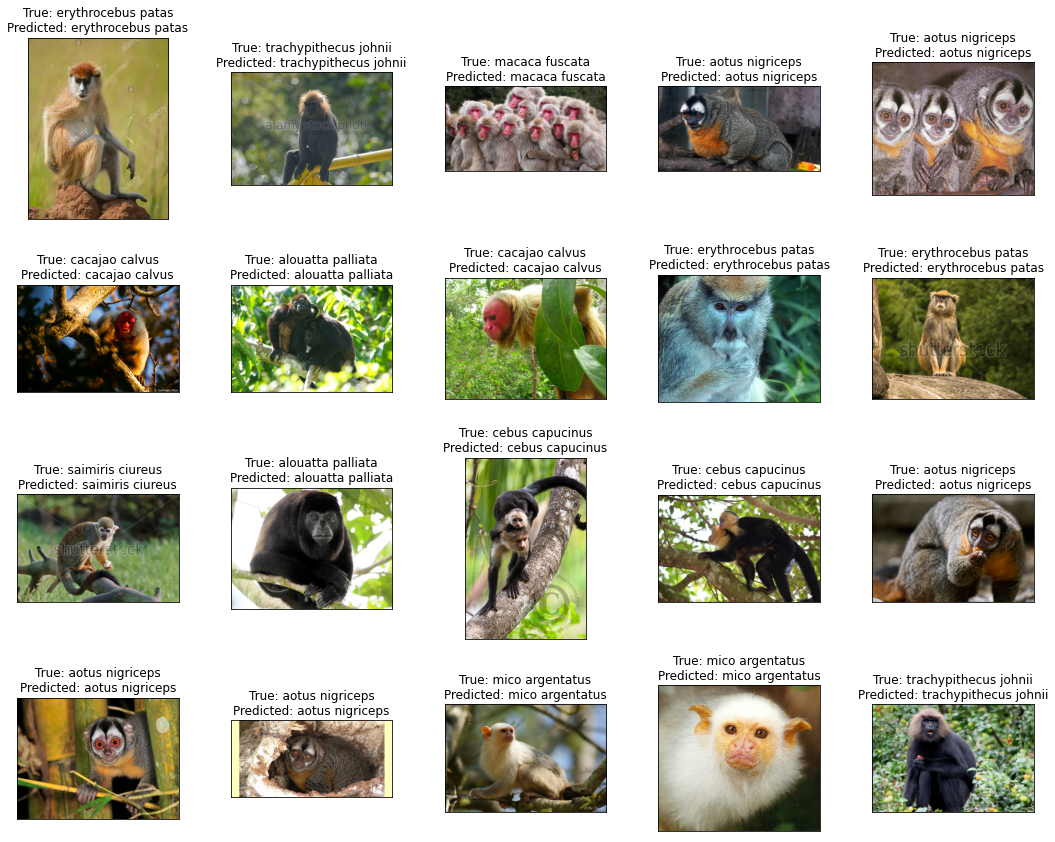

In [74]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}")
plt.tight_layout()
plt.show()

### 4.2 Решить задачу 3.2, воспользовавшись подходящей предобученной моделью
* Не использовать VGG16 (вместо нее можно взять resnet18 или другую)
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель. 
* Вычислить значение accuracy на тестовом множестве (добиться значения не меньше 97-98%)

In [75]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [76]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset 
from PIL import Image

In [77]:
from sklearn.model_selection import train_test_split
dataset = ImageFolder("/content/cats_dogs/train")
train_data, test_data, train_label, test_label = train_test_split(dataset.imgs, dataset.targets, test_size=0.2, random_state=42)

# ImageLoader Class

class ImageLoader(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = self.checkChannel(dataset) 
        self.transform = transform
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, item):
        image = Image.open(self.dataset[item][0])
        classCategory = self.dataset[item][1]
        if self.transform:
            image = self.transform(image)
        return image, classCategory
        
    
    def checkChannel(self, dataset):
        datasetRGB = []
        for index in range(len(dataset)):
            if (Image.open(dataset[index][0]).getbands() == ("R", "G", "B")): # Провека каналов
                datasetRGB.append(dataset[index])
        return datasetRGB

In [78]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
]) # train transform

test_transform = transforms.Compose([
    transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
]) # test transform

train_dataset = ImageLoader(train_data, train_transform)
test_dataset = ImageLoader(test_data, test_transform)

In [79]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [80]:
from tqdm import tqdm
from torchvision import models
# загрузка предварительно обученной модели и модификация
model = models.resnet50(pretrained=True)

# Если нужно выполнить точную настройку, то следует установить requires_grad = False
# Удалить эти две строки, если нужно обучить всю модель целиком,
# и нужно загрузить только веса предварительного обучения

for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [81]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(num_epoch, model):
    for epoch in range(0, num_epoch):
        losses = []
        model.train()
        loop = tqdm(enumerate(train_loader), total=len(train_loader))
        for batch_idx, (data, targets) in loop:
            data = data.to(device=device)
            targets = targets.to(device=device)
            scores = model(data)
            
            loss = criterion(scores, targets)
            optimizer.zero_grad()
            losses.append(loss)
            loss.backward()
            optimizer.step()
            _, preds = torch.max(scores, 1)
            loop.set_description(f"Epoch {epoch+1}/{num_epoch} process: {int((batch_idx / len(train_loader)) * 100)}")
            loop.set_postfix(loss=loss.data.item())
        
        torch.save({ 
                    'model_state_dict': model.state_dict(), 
                    'optimizer_state_dict': optimizer.state_dict(), 
                    }, 'checpoint_epoch_'+str(epoch)+'.pt')
        
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)
            output = model(x)
            _, predictions = torch.max(output, 1)
            correct += (predictions == y).sum().item()
            test_loss = criterion(output, y)
            
    test_loss /= len(test_loader.dataset)
    print("Average Loss: ", test_loss, "  Accuracy: ", correct, " / ",
    len(test_loader.dataset), "  ", int(correct / len(test_loader.dataset) * 100), "%")

In [82]:
if __name__ == "__main__":
    train(5, model) # train
    test() # test

Epoch 5/5 process: 99: 100%|██████████| 313/313 [02:36<00:00,  2.00it/s, loss=0.835]


Average Loss:  tensor(3.7021e-05, device='cuda:0')   Accuracy:  4880  /  5000    97 %
